# IMPORTING LIBRARIES 

In [1]:
import numpy as np 
import pandas as pd
import pickle

# READING DATASET

In [3]:
df=pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


# Splitting The Data Into Train And Test

In [4]:
from sklearn.model_selection import train_test_split
x=df[['GRE Score','TOEFL Score','University Rating','CGPA']]
y=df['Chance of Admit ']

In [5]:
y=(y>0.5).astype(int)

In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: Chance of Admit , Length: 400, dtype: int32

In [7]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Training the model

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from decimal import Decimal
svm_clf = SVC(probability = True, kernel='linear')
svm_clf.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

# Testing the model

In [9]:
y_pred = svm_clf.predict(x_test)

acc_svm = round(Decimal(accuracy_score(y_test, y_pred) * 100), 2)

print(f"Accuracy (SVM) : {acc_svm}%")

Accuracy (SVM) : 93.75%


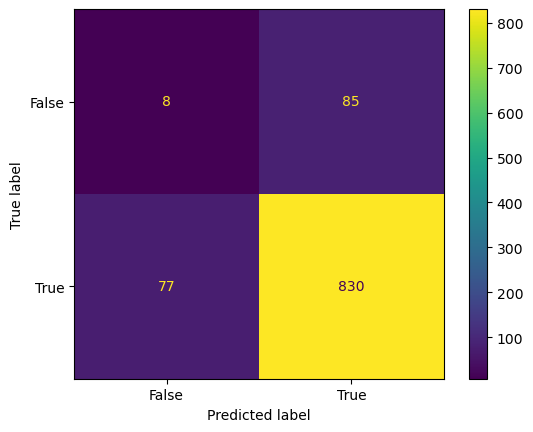

In [10]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [11]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.95      0.99      0.97        73

    accuracy                           0.94        80
   macro avg       0.85      0.71      0.76        80
weighted avg       0.93      0.94      0.93        80



In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [13]:
# Import the model we are using

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train,y_train);

In [14]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_train)
# Calculate the absolute errors
errors = abs(predictions - y_train)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.04 degrees.


In [17]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_train)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')



Accuracy 94%


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

drugTree.fit(x_train, y_train)
predicted = drugTree.predict(x_test)

print(predicted)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predicted))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1]
DecisionTrees's Accuracy:  0.8875


In [19]:
filename='svm.pkl'
pickle.dump(svm_clf,open(filename,'wb'))


In [20]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [22]:
y_pred = gnb.predict(x_test)

y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [23]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8625


In [24]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(x_train)
xtest = sc_x.transform(x_test)

print (xtrain[0:10, :])

[[-0.78273911 -0.72719334 -0.97762    -0.20053014]
 [ 1.99550994  2.01617126  1.65127412  1.6347779 ]
 [-0.86955939 -0.88856772 -0.10132196 -0.56428488]
 [-0.43545798 -1.04994211 -0.97762    -0.94457394]
 [-0.52227826 -0.24307017 -0.97762    -0.58081919]
 [ 1.21412739  2.01617126 -0.10132196  0.57658227]
 [ 0.6932057   0.56380177 -0.10132196  0.1466903 ]
 [ 1.21412739  0.72517616  1.65127412  1.96546403]
 [-0.86955939  0.24105299 -0.10132196 -1.01071116]
 [ 0.34592456 -0.08169578 -0.97762    -0.28320167]]


In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9375
